In [2]:
execfile('setting.py')

In [6]:
df1=pd.read_csv("/home/piai/다운로드/B2_유통(BtoB)/01_sales_data2.csv")
df2=pd.read_csv("/home/piai/다운로드/B2_유통(BtoB)/02_customer_data.csv")
df3=pd.read_csv("/home/piai/다운로드/B2_유통(BtoB)/03_stock_data.csv")

In [7]:
df1.head()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5


In [8]:
df=pd.merge(df1,df2,on=['customer_id'],how='left')
df.shape

(282642, 15)

In [9]:
df=pd.merge(df,df3,on='product_name',how='left')
df.shape

(282642, 16)

In [10]:
df.head()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment


In [11]:
df.describe(include='all')

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type
count,282642,282642,282642,282642.000000,282642,282642.000000,282642,282642.000000,282642,282642,282642.000000,282642.000000,282642,282642,282642,282642
unique,16069,3560,3715,NaN,308,NaN,3458,NaN,13,9,NaN,NaN,3,3,4,2
top,580727,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2021-12-05,NaN,E17841,NaN,New York,NY,NaN,NaN,middle,metro,east,consignment
freq,529,1660,1653,NaN,3228,NaN,5807,NaN,80118,80118,NaN,NaN,186285,151787,123483,258152
mean,NaN,NaN,NaN,11.701580,NaN,3.324527,NaN,19.634593,NaN,NaN,3895.721683,911.010717,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,295.643508,NaN,79.572114,NaN,510.341936,NaN,NaN,2841.669244,387.393163,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,NaN,-168469.600000,NaN,NaN,339.000000,93.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,NaN,4.250000,NaN,NaN,1585.000000,778.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,5.000000,NaN,1.950000,NaN,10.500000,NaN,NaN,2671.000000,778.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,NaN,17.850000,NaN,NaN,8177.000000,1216.000000,NaN,NaN,NaN,NaN


In [12]:
df[df['product_name']=='WHITE HANGING HEART T-LIGHT HOLDER']['stock_type'].nunique()

1

In [13]:
len(df['customer_id'].value_counts())

3458

In [14]:
pd.DataFrame([{'products': len(df['product_code'].value_counts()),    
               'transactions': len(df['invoice'].value_counts()),
               'customers': len(df['customer_id'].value_counts()),}], 
             columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3560,16069,3458


In [15]:
#고객주문번호별 상품 개수
temp_pro = df.groupby(by=['customer_id', 'invoice'], as_index=False)['date'].count()

nb_products_per_basket = temp_pro.rename(columns = {'date':'Number of products'})
nb_products_per_basket[:10].sort_values('customer_id')

,customer_id,invoice,Number of products
0,E12346,541431,1
1,E12346,C541433,1
2,E12747,541677,5
3,E12747,545321,12
4,E12747,551992,9
5,E12747,554549,14
6,E12747,558265,8
7,E12747,563949,7
8,E12747,569397,15
9,E12747,581163,7


In [16]:
nb_products_per_basket.info()

SyntaxError: invalid syntax (2539479505.py, line 1)

In [28]:
nb_products_per_basket['order_canceled'] = nb_products_per_basket['invoice'].apply(lambda x:int('C' in x)) 
display(nb_products_per_basket[:5])

n1 = nb_products_per_basket['order_canceled'].sum()

n2 = nb_products_per_basket.shape[0]

print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

,customer_id,invoice,Number of products,order_canceled
0,E12346,541431,1,0
1,E12346,C541433,1,1
2,E12747,541677,5,0
3,E12747,545321,12,0
4,E12747,551992,9,0


Number of orders canceled: 2487/16069 (15.48%) 


In [18]:
nb_products_per_basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16069 entries, 0 to 16068
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         16069 non-null  object
 1   invoice             16069 non-null  object
 2   Number of products  16069 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 376.7+ KB


In [19]:
nb_products_per_basket['invoice']

0         541431
1        C541433
2         541677
3         545321
4         551992
          ...   
16064     560025
16065     560032
16066     565579
16067     580872
16068     554065
Name: invoice, Length: 16069, dtype: object

In [20]:
dty=[]
for i in nb_products_per_basket['invoice']:
    dty.append(type(i))
dty

[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 int,
 int,
 str,
 str,
 str,
 str,
 int,
 str,
 str,
 str,
 str,
 str,
 str,
 str

In [21]:
set(dty)

{int, str}

In [22]:
ndty=[]
for i in nb_products_per_basket['invoice']:
    ndty.append(str(i))
ndty

['541431',
 'C541433',
 '541677',
 '545321',
 '551992',
 '554549',
 '558265',
 '563949',
 '569397',
 '581163',
 '540251',
 '540257',
 '541248',
 '541432',
 '544315',
 '544686',
 '544819',
 '545062',
 '545159',
 '545979',
 '546366',
 '546380',
 '546381',
 '546412',
 '546991',
 '547227',
 '547669',
 '547809',
 '547816',
 '547818',
 '547819',
 '548656',
 '548657',
 '549523',
 '550320',
 '551419',
 '551424',
 '551530',
 '552036',
 '552189',
 '552242',
 '552243',
 '552244',
 '552245',
 '552246',
 '552247',
 '552248',
 '552249',
 '552250',
 '552251',
 '552304',
 '552307',
 '552693',
 '552829',
 '552861',
 '552959',
 '553015',
 '553016',
 '554924',
 '554947',
 '555091',
 '555620',
 '555854',
 '555875',
 '556067',
 '556068',
 '556456',
 '556910',
 '556922',
 '557250',
 '557524',
 '557635',
 '557783',
 '557800',
 '557953',
 '558330',
 '558527',
 '558702',
 '558705',
 '558707',
 '558708',
 '558770',
 '559508',
 '559688',
 '560089',
 '560412',
 '560863',
 '561629',
 '561802',
 '561895',
 '562199'

In [23]:
dty=[]
for i in ndty:
    dty.append(type(i))
dty

[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str

In [24]:
nb_products_per_basket['invoice'].nunique()

16069

In [25]:
nb_products_per_basket['invoice']=ndty

In [26]:
nb_products_per_basket['invoice'].nunique()

16068

In [27]:
nb_products_per_basket['invoice'].isnull().sum()

0

In [29]:
display(df.sort_values('customer_id')[:5])

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type
9607,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2021-01-18,1.04,E12346,77183.6,Houston,TX,2325,1658,middle,other,south,consignment
9612,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2021-01-18,1.04,E12346,-77183.6,Houston,TX,2325,1658,middle,other,south,consignment
171460,563949,82486,WOOD S/3 CABINET ANT WHITE FINISH,2,2021-08-22,8.95,E12747,17.9,New York,NY,8177,778,big,metro,east,consignment
171459,563949,48173C,DOORMAT BLACK FLOCK,2,2021-08-22,7.95,E12747,15.9,New York,NY,8177,778,big,metro,east,consignment
171458,563949,21754,HOME BUILDING BLOCK WORD,6,2021-08-22,5.95,E12747,35.7,New York,NY,8177,778,big,metro,east,consignment


In [30]:
df_cleaned = df.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = []
doubtfull_entry = []

for index, col in  df.iterrows():
    # 주문 수량이 0보다 크거나 할인의 경우
    if (col['quantity'] > 0): 
        continue        
    df_test = df[(df['customer_id'] == col['customer_id']) &
                         (df['product_code']  == col['product_code']) & 
                         (df['date'] < col['date']) & 
                         (df['quantity']   > 0)].copy()
    
    # 주문일이 더 빠르고 수량이 0보다 큰 경우가 1개도 없는 경우
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    
    # 주문일이 더 빠르고 수량이 0보다 큰 경우가 1개 있는 경우
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        # 취소된 수량에 대한 컬럼을 새로 생성한다.
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['quantity']
        entry_to_remove.append(index) 
    
    # 주문일이 더 빠르고 수량이 0보다 큰 경우가 2개 이상인 경우
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)    

        for ind, val in df_test.iterrows():
            if val['quantity'] < -col['quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['quantity']
            entry_to_remove.append(index) 
            break 

In [31]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 4368
doubtfull_entry: 1442


In [32]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)

In [33]:
remaining_entries = df_cleaned[(df_cleaned['quantity'] < 0) & (df_cleaned['product_code'] != 'D')]
print("nb of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries.head(5)

nb of entries to delete: 45


,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled
18467,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2021-01-31,0.65,E15358,-61.10,New York,NY,8177,778,big,metro,east,consignment,0
26547,C544038,22784,LANTERN CREAM GAZEBO,-4,2021-02-15,4.95,E14659,-19.80,Chicago,IL,2671,589,middle,metro,east,consignment,0
40994,C545852,22464,HANGING METAL HEART LANTERN,-5,2021-03-07,1.65,E14048,-8.25,New York,NY,8177,778,big,metro,east,consignment,0
43668,C546191,47566B,TEA TIME PARTY BUNTING,-35,2021-03-10,0.70,E16422,-24.50,Houston,TX,2325,1658,middle,other,south,consignment,0
67262,C549544,21035,SET/2 RED RETROSPOT TEA TOWELS,-100,2021-04-10,2.75,E15311,-275.00,Houston,TX,2325,1658,middle,other,south,consignment,0


In [34]:
remaining_entries.sort_index(axis=0)[:5]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled
18467,C542742,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,-94,2021-01-31,0.65,E15358,-61.10,New York,NY,8177,778,big,metro,east,consignment,0
26547,C544038,22784,LANTERN CREAM GAZEBO,-4,2021-02-15,4.95,E14659,-19.80,Chicago,IL,2671,589,middle,metro,east,consignment,0
40994,C545852,22464,HANGING METAL HEART LANTERN,-5,2021-03-07,1.65,E14048,-8.25,New York,NY,8177,778,big,metro,east,consignment,0
43668,C546191,47566B,TEA TIME PARTY BUNTING,-35,2021-03-10,0.70,E16422,-24.50,Houston,TX,2325,1658,middle,other,south,consignment,0
67262,C549544,21035,SET/2 RED RETROSPOT TEA TOWELS,-100,2021-04-10,2.75,E15311,-275.00,Houston,TX,2325,1658,middle,other,south,consignment,0


In [35]:
df_cleaned.head(5)

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,0
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,0
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,0
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,0
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,0


In [36]:
list_special_codes = df_cleaned[df_cleaned['product_code'].str.contains('^[a-zA-Z]+', regex=True)]['product_code'].unique()
list_special_codes

array(['M', 'BANK CHARGES', 'C2', 'POST', 'PADS', 'DOT'], dtype=object)

In [37]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['product_code'] == code]['product_name'].unique()[0]))

M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
C2              -> CARRIAGE                      
POST            -> POSTAGE                       
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                


In [45]:
df_cleaned['TotalPrice'] = df_cleaned['unit_price'] * (df_cleaned['quantity'] - df_cleaned['QuantityCanceled'])
df_cleaned.sort_values('customer_id')[:5]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,date_int,TotalPrice
9607,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2021-01-18,1.04,E12346,77183.60,Houston,TX,2325,1658,middle,other,south,consignment,0,1610928000000000000,77183.60
103622,554549,22425,ENAMEL COLANDER CREAM,3,2021-05-25,4.95,E12747,14.85,New York,NY,8177,778,big,metro,east,consignment,0,1621900800000000000,14.85
103625,554549,22606,WOODEN SKITTLES GARDEN SET,1,2021-05-25,15.95,E12747,15.95,New York,NY,8177,778,big,metro,east,consignment,0,1621900800000000000,15.95
103626,554549,22607,WOODEN ROUNDERS GARDEN SET,2,2021-05-25,9.95,E12747,19.90,New York,NY,8177,778,big,metro,east,consignment,0,1621900800000000000,19.90
217743,569397,21136,PAINTED METAL PEARS ASSORTED,16,2021-10-04,1.69,E12747,27.04,New York,NY,8177,778,big,metro,east,consignment,0,1633305600000000000,27.04


In [51]:
df_cleaned.shape

(276832, 19)

In [49]:
df_cleaned[df_cleaned['TotalPrice']==0]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,date_int,TotalPrice
26,540002,21911,GARDEN METAL SIGN,12,2021-01-04,1.65,E16656,19.80,San Jose,CA,1003,461,middle,sightseeing,west,consignment,12,1609718400000000000,0.0
143,540014,20772,GARDEN PATH JOURNAL,1,2021-01-04,2.55,E14606,2.55,San Diego,CA,1429,844,middle,sightseeing,west,consignment,1,1609718400000000000,0.0
312,540021,79160,HEART SHAPE WIRELESS DOORBELL,2,2021-01-04,2.10,E17841,4.20,New York,NY,8177,778,big,metro,east,consignment,2,1609718400000000000,0.0
564,540093,21463,MIRRORED DISCO BALL,1,2021-01-04,5.95,E16725,5.95,New York,NY,8177,778,big,metro,east,consignment,1,1609718400000000000,0.0
753,540113,84766,SILVER ROCOCO CANDLE STICK,12,2021-01-05,1.95,E13126,23.40,Los Angeles,CA,3985,1216,middle,metro,west,consignment,12,1609804800000000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280565,674920,23480,MINI LIGHTS WOODLAND MUSHROOMS,1,2021-10-12,0.00,E13985,0.00,Los Angeles,CA,3985,1216,middle,metro,west,consignment,0,1633996800000000000,0.0
280631,675003,23459,DOLLY CABINET 2 DRAWERS,2,2021-10-24,12.50,E15950,25.00,New York,NY,8177,778,big,metro,east,consignment,2,1635033600000000000,0.0
280645,675003,22423,REGENCY CAKESTAND 3 TIER,1,2021-10-22,12.75,E15950,12.75,New York,NY,8177,778,big,metro,east,consignment,1,1634860800000000000,0.0
281340,680128,85034C,3 ROSE MORRIS BOXED CANDLES,12,2021-11-19,4.25,E17576,51.00,Houston,TX,2325,1658,middle,other,south,consignment,12,1637280000000000000,0.0


In [52]:
df_cleaned[df_cleaned['TotalPrice']!=0]

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,date_int,TotalPrice
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.50,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,1609718400000000000,19.50
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.50,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,1609718400000000000,10.50
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.50,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,1609718400000000000,10.50
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.50,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,1609718400000000000,10.50
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.50,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,1609718400000000000,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282637,681452,21181,PLEASE ONE PERSON METAL SIGN,36,2021-12-23,2.10,E17675,75.60,Houston,TX,2325,1658,middle,other,south,consignment,0,1640217600000000000,75.60
282638,681452,22075,6 RIBBONS ELEGANT CHRISTMAS,24,2021-12-29,0.39,E17675,9.36,Houston,TX,2325,1658,middle,other,south,consignment,0,1640736000000000000,9.36
282639,681452,22086,PAPER CHAIN KIT 50'S CHRISTMAS,40,2021-12-25,2.55,E17675,102.00,Houston,TX,2325,1658,middle,other,south,consignment,0,1640390400000000000,102.00
282640,681452,22191,IVORY DINER WALL CLOCK,2,2021-12-21,8.50,E17675,17.00,Houston,TX,2325,1658,middle,other,south,consignment,0,1640044800000000000,17.00


In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276832 entries, 0 to 282641
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   invoice           276832 non-null  object 
 1   product_code      276832 non-null  object 
 2   product_name      276832 non-null  object 
 3   quantity          276832 non-null  int64  
 4   date              276832 non-null  object 
 5   unit_price        276832 non-null  float64
 6   customer_id       276832 non-null  object 
 7   sales             276832 non-null  float64
 8   city              276832 non-null  object 
 9   state             276832 non-null  object 
 10  pop_thousand      276832 non-null  int64  
 11  land_sq_meter     276832 non-null  int64  
 12  pop_size          276832 non-null  object 
 13  city_type         276832 non-null  object 
 14  city_lctn         276832 non-null  object 
 15  stock_type        276832 non-null  object 
 16  QuantityCanceled  27

In [43]:
df_cleaned['date'] = df_cleaned['date'].astype('datetime64[ns]')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276832 entries, 0 to 282641
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice           276832 non-null  object        
 1   product_code      276832 non-null  object        
 2   product_name      276832 non-null  object        
 3   quantity          276832 non-null  int64         
 4   date              276832 non-null  datetime64[ns]
 5   unit_price        276832 non-null  float64       
 6   customer_id       276832 non-null  object        
 7   sales             276832 non-null  float64       
 8   city              276832 non-null  object        
 9   state             276832 non-null  object        
 10  pop_thousand      276832 non-null  int64         
 11  land_sq_meter     276832 non-null  int64         
 12  pop_size          276832 non-null  object        
 13  city_type         276832 non-null  object        
 14  city

In [44]:
df_cleaned['date_int'] = df_cleaned['date'].astype('int')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276832 entries, 0 to 282641
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice           276832 non-null  object        
 1   product_code      276832 non-null  object        
 2   product_name      276832 non-null  object        
 3   quantity          276832 non-null  int64         
 4   date              276832 non-null  datetime64[ns]
 5   unit_price        276832 non-null  float64       
 6   customer_id       276832 non-null  object        
 7   sales             276832 non-null  float64       
 8   city              276832 non-null  object        
 9   state             276832 non-null  object        
 10  pop_thousand      276832 non-null  int64         
 11  land_sq_meter     276832 non-null  int64         
 12  pop_size          276832 non-null  object        
 13  city_type         276832 non-null  object        
 14  city

In [54]:
temp_sum = df_cleaned.groupby(by=['customer_id', 'invoice'], as_index=False)['TotalPrice'].sum()
basket_price = temp_sum.rename(columns = {'TotalPrice':'Basket Price'})

df_cleaned['date_int'] = df_cleaned['date'].astype('int64')
temp_date = df_cleaned.groupby(by=['customer_id', 'invoice'], as_index=False)['date_int'].mean()
df_cleaned.drop('date_int', axis = 1, inplace = True)
basket_price.loc[:, 'date'] = pd.to_datetime(temp_date['date_int'])

basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('customer_id')[:6]

,customer_id,invoice,Basket Price,date
0,E12346,541431,77183.60,2021-01-18
1,E12747,541677,303.04,2021-01-20
2,E12747,545321,310.78,2021-03-01
3,E12747,551992,442.96,2021-05-05
4,E12747,554549,328.35,2021-05-25
5,E12747,558265,376.30,2021-06-28


In [55]:
basket_price.tail(6)

,customer_id,invoice,Basket Price,date
13608,E18283,557956,192.80,2021-06-23
13609,E18283,560025,137.39,2021-07-14
13610,E18283,560032,2.50,2021-07-14
13611,E18283,565579,134.90,2021-09-05
13612,E18283,580872,208.00,2021-12-06
13613,E18287,554065,765.28,2021-05-22


In [56]:
basket_price.max(), basket_price.min()

(customer_id                  E18287
 Basket Price               168469.6
 date            2021-12-29 00:00:00
 dtype: object,
 customer_id                  E12346
 Basket Price                    0.4
 date            2021-01-04 00:00:00
 dtype: object)

In [57]:
df_cleaned['month']=df_cleaned['date'].dt.month # 월 정보
df_cleaned.head()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,TotalPrice,month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,19.5,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,10.5,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,10.5,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,10.5,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,0,12.5,1


In [61]:
df_canceled=df_cleaned[df_cleaned['QuantityCanceled']!=0]

In [62]:
df_canceled

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,TotalPrice,month
26,540002,21911,GARDEN METAL SIGN,12,2021-01-04,1.65,E16656,19.80,San Jose,CA,1003,461,middle,sightseeing,west,consignment,12,0.00,1
27,540002,22625,RED KITCHEN SCALES,8,2021-01-04,8.50,E16656,68.00,San Jose,CA,1003,461,middle,sightseeing,west,consignment,1,59.50,1
28,540002,21259,VICTORIAN SEWING BOX SMALL,24,2021-01-04,4.95,E16656,118.80,San Jose,CA,1003,461,middle,sightseeing,west,consignment,3,103.95,1
33,540003,22767,TRIPLE PHOTO FRAME CORNICE,4,2021-01-04,9.95,E16875,39.80,Phoenix,AZ,1759,1341,middle,other,west,consignment,1,29.85,1
34,540003,22963,JAM JAR WITH GREEN LID,12,2021-01-04,0.85,E16875,10.20,Phoenix,AZ,1759,1341,middle,other,west,consignment,8,3.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280645,675003,22423,REGENCY CAKESTAND 3 TIER,1,2021-10-22,12.75,E15950,12.75,New York,NY,8177,778,big,metro,east,consignment,1,0.00,10
281143,679900,23458,DOLLY CABINET 3 DRAWERS,2,2021-11-11,14.95,E15951,29.90,New York,NY,8177,778,big,metro,east,consignment,1,14.95,11
281176,679946,22197,POPCORN HOLDER,15,2021-10-20,0.85,E15993,12.75,Chicago,IL,2671,589,middle,metro,east,consignment,1,11.90,10
281340,680128,85034C,3 ROSE MORRIS BOXED CANDLES,12,2021-11-19,4.25,E17576,51.00,Houston,TX,2325,1658,middle,other,south,consignment,12,0.00,11


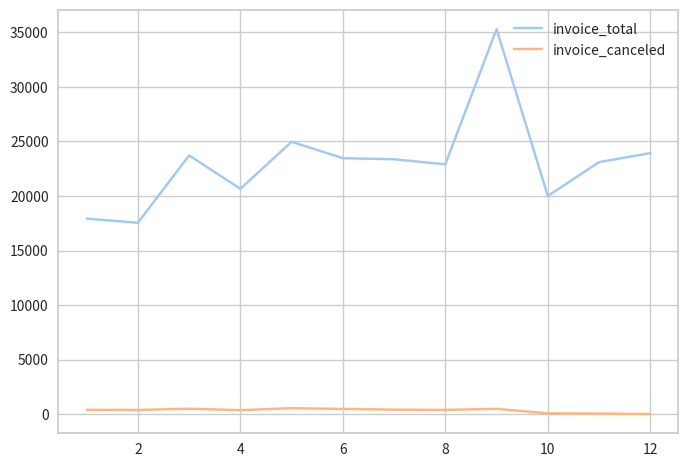

In [67]:
df_invoice_num=df_cleaned.groupby('month')['invoice'].count()
df_canceled_invoice=df_canceled.groupby('month')['invoice'].count()
plt.plot(df_invoice_num,label='invoice_total')
plt.plot(df_canceled_invoice,label='invoice_canceled')
plt.legend()
plt.show()

In [64]:
df_canceled.groupby('month')['sales'].sum()

month
1     35135.50
2     15721.07
3     20997.86
4     14291.29
5     22754.28
6     23015.09
7     18143.60
8     27881.79
9     20509.80
10     5962.51
11     2592.01
12      808.96
Name: sales, dtype: float64

In [71]:
df['date'] = df['date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282642 entries, 0 to 282641
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   invoice        282642 non-null  object        
 1   product_code   282642 non-null  object        
 2   product_name   282642 non-null  object        
 3   quantity       282642 non-null  int64         
 4   date           282642 non-null  datetime64[ns]
 5   unit_price     282642 non-null  float64       
 6   customer_id    282642 non-null  object        
 7   sales          282642 non-null  float64       
 8   city           282642 non-null  object        
 9   state          282642 non-null  object        
 10  pop_thousand   282642 non-null  int64         
 11  land_sq_meter  282642 non-null  int64         
 12  pop_size       282642 non-null  object        
 13  city_type      282642 non-null  object        
 14  city_lctn      282642 non-null  object        
 15  

In [72]:
df['month']=df['date'].dt.month # 월 정보
df.head()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,month
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment,1


In [73]:
df_sales=df.groupby('month')['sales'].sum()

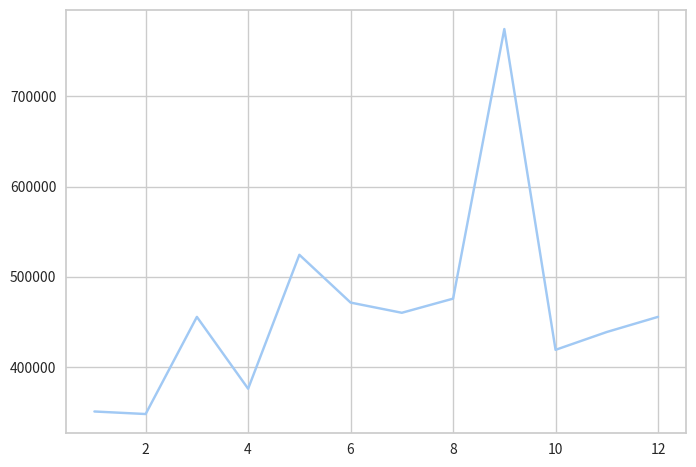

In [75]:
plt.plot(df_sales)

In [76]:
canpr=[]
for i in df['sales']:
    if i>=0:
        canpr.append(0)
    elif i<0:
        canpr.append(abs(i))
canpr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2.1,
 16.95,
 12.75,
 53.7,
 17.700000000000003,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0

In [77]:
len(canpr)

282642

In [78]:
df['city'].duplicated().value_counts()
#13개 도시에서 주문

True     282629
False        13
Name: city, dtype: int64

In [80]:
df['invoice'].duplicated().value_counts()
#송장 가짓수 총 16069

True     266573
False     16069
Name: invoice, dtype: int64

In [81]:
print('Duplicate Entries: {}'.format(df.duplicated().sum()))
#중복값 없음

Duplicate Entries: 0


In [106]:
df_invoice=df_cleaned.groupby('month')['invoice'].nunique()

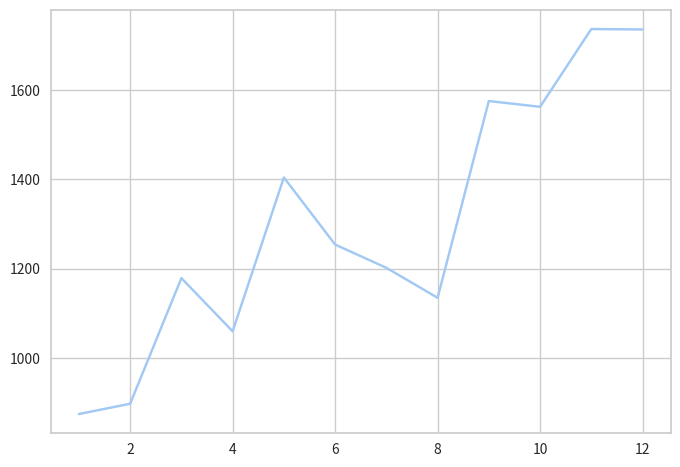

In [107]:
plt.plot(df_invoice)

In [109]:
df_cleaned.describe(include='all')

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,TotalPrice,month
count,276832,276832,276832,276832.000000,276832,276832.000000,276832,276832.000000,276832,276832,276832.000000,276832.000000,276832,276832,276832,276832,276832.000000,276832.000000,276832.000000
unique,13614,3547,3702,NaN,308,NaN,3416,NaN,13,9,NaN,NaN,3,3,4,2,NaN,NaN,NaN
top,580727,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2021-12-05 00:00:00,NaN,E17841,NaN,New York,NY,NaN,NaN,middle,metro,east,consignment,NaN,NaN,NaN
freq,529,1629,1622,NaN,3208,NaN,5699,NaN,78522,78522,NaN,NaN,182410,148733,120941,252795,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2021-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.754042,NaN,2.990421,NaN,21.773092,NaN,NaN,3897.125708,911.198933,NaN,NaN,NaN,NaN,0.178664,21.383435,6.783457
std,NaN,NaN,NaN,213.306190,NaN,19.195066,NaN,367.580795,NaN,NaN,2841.984976,387.396619,NaN,NaN,NaN,NaN,10.018290,366.883715,3.330734
min,NaN,NaN,NaN,-152.000000,NaN,0.000000,NaN,-275.000000,NaN,NaN,339.000000,93.000000,NaN,NaN,NaN,NaN,0.000000,-350.400000,1.000000
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,NaN,4.950000,NaN,NaN,1585.000000,778.000000,NaN,NaN,NaN,NaN,0.000000,4.680000,4.000000


In [96]:
temp_cou = df[['customer_id', 'invoice', 'city']].groupby(['customer_id','invoice','city']).count()



In [97]:
temp_cou

Empty DataFrame
Columns: []
Index: [(E12346, 541431, Houston), (E12346, C541433, Houston), (E12747, 541677, New York), (E12747, 545321, New York), (E12747, 551992, New York), (E12747, 554549, New York), (E12747, 558265, New York), (E12747, 563949, New York), (E12747, 569397, New York), (E12747, 581163, New York), (E12748, 540251, Phoenix), (E12748, 540257, Phoenix), (E12748, 541248, Phoenix), (E12748, 541432, Phoenix), (E12748, 544315, Phoenix), (E12748, 544686, Phoenix), (E12748, 544819, Phoenix), (E12748, 545062, Phoenix), (E12748, 545159, Phoenix), (E12748, 545979, Phoenix), (E12748, 546366, Phoenix), (E12748, 546380, Phoenix), (E12748, 546381, Phoenix), (E12748, 546412, Phoenix), (E12748, 546991, Phoenix), (E12748, 547227, Phoenix), (E12748, 547669, Phoenix), (E12748, 547809, Phoenix), (E12748, 547816, Phoenix), (E12748, 547818, Phoenix), (E12748, 547819, Phoenix), (E12748, 548656, Phoenix), (E12748, 548657, Phoenix), (E12748, 549523, Phoenix), (E12748, 550320, Phoenix), (E12748, 551419, Phoenix), (E12748, 551424, Phoenix), (E12748, 551530, Phoenix), (E12748, 552036, Phoenix), (E12748, 552189, Phoenix), (E12748, 552242, Phoenix), (E12748, 552243, Phoenix), (E12748, 552244, Phoenix), (E12748, 552245, Phoenix), (E12748, 552246, Phoenix), (E12748, 552247, Phoenix), (E12748, 552248, Phoenix), (E12748, 552249, Phoenix), (E12748, 552250, Phoenix), (E12748, 552251, Phoenix), (E12748, 552304, Phoenix), (E12748, 552307, Phoenix), (E12748, 552693, Phoenix), (E12748, 552829, Phoenix), (E12748, 552861, Phoenix), (E12748, 552959, Phoenix), (E12748, 553015, Phoenix), (E12748, 553016, Phoenix), (E12748, 554924, Phoenix), (E12748, 554947, Phoenix), (E12748, 555091, Phoenix), (E12748, 555620, Phoenix), (E12748, 555854, Phoenix), (E12748, 555875, Phoenix), (E12748, 556067, Phoenix), (E12748, 556068, Phoenix), (E12748, 556456, Phoenix), (E12748, 556910, Phoenix), (E12748, 556922, Phoenix), (E12748, 557250, Phoenix), (E12748, 557524, Phoenix), (E12748, 557635, Phoenix), (E12748, 557783, Phoenix), (E12748, 557800, Phoenix), (E12748, 557953, Phoenix), (E12748, 558330, Phoenix), (E12748, 558527, Phoenix), (E12748, 558702, Phoenix), (E12748, 558705, Phoenix), (E12748, 558707, Phoenix), (E12748, 558708, Phoenix), (E12748, 558770, Phoenix), (E12748, 559508, Phoenix), (E12748, 559688, Phoenix), (E12748, 560089, Phoenix), (E12748, 560412, Phoenix), (E12748, 560863, Phoenix), (E12748, 561629, Phoenix), (E12748, 561802, Phoenix), (E12748, 561895, Phoenix), (E12748, 562199, Phoenix), (E12748, 562426, Phoenix), (E12748, 562552, Phoenix), (E12748, 562590, Phoenix), (E12748, 562591, Phoenix), (E12748, 563576, Phoenix), (E12748, 564336, Phoenix), (E12748, 564534, Phoenix), (E12748, 564540, Phoenix), (E12748, 564555, Phoenix), ...]

[16069 rows x 0 columns]

In [98]:
temp_cou = temp_cou.reset_index(drop = False)

In [99]:
temp_cou

,customer_id,invoice,city
0,E12346,541431,Houston
1,E12346,C541433,Houston
2,E12747,541677,New York
3,E12747,545321,New York
4,E12747,551992,New York
...,...,...,...
16064,E18283,560025,San Diego
16065,E18283,560032,San Diego
16066,E18283,565579,San Diego
16067,E18283,580872,San Diego


In [100]:
city = temp_cou['city'].value_counts()
print('No. of countries in the dataframe: {}'.format(len(city)))

No. of countries in the dataframe: 13


In [101]:
city.index

Index(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'San Diego',
       'Dallas', 'Philadelphia', 'San Antonio', 'San Jose', 'Las Vegas',
       'Miami', 'Honolulu'],
      dtype='object')

In [102]:
city

New York        4531
Los Angeles     2371
Chicago         1556
Houston         1512
Phoenix         1177
San Diego       1013
Dallas           893
Philadelphia     806
San Antonio      736
San Jose         619
Las Vegas        434
Miami            281
Honolulu         140
Name: city, dtype: int64

In [103]:
import plotly.express as px
import pandas as pd 
import os 
import json 

In [105]:
root_path = os.getcwd() # 실행 코드가 있는 곳 
root_path

'/home/piai/빅데이터/빅데이터프로젝트'

In [110]:
data_path = os.path.join(root_path, 'data') # 실험에 쓰일 데이터가 있는 곳 
data_path

'/home/piai/빅데이터/빅데이터프로젝트/data'

In [115]:
# import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib as mpl
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [112]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
pio.renderers
pio.renderers.default = 'colab'
pio.renderers

data = dict(type='choropleth', 
            locations = city.index,
            locationmode = 'city names', z = city,
            text = city.index, colorbar = {'title':'Order no.'},
            colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
            reversescale = False)

In [116]:
layout = dict(title='Number of orders per city',
              geo = dict(showframe = True, projection={'type':'mercator'}))

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'locationmode' property of choropleth
        Received value: 'city names'

    The 'locationmode' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['ISO-3', 'USA-states', 'country names', 'geojson-id']